In [1]:
from xml.dom import minidom
from svg.path import parse_path

doc = minidom.parse('test.svg')

for ipath, path in enumerate(doc.getElementsByTagName('path')):
    global parsed
    print('Path', ipath)
    d = path.getAttribute('d')
    parsed = parse_path(d)
    print('Objects:\n', parsed, '\n' + '-' * 20)
    for obj in parsed:
        print(type(obj).__name__, ', start/end coords:', ((round(obj.start.real, 3), round(obj.start.imag, 3)), (round(obj.end.real, 3), round(obj.end.imag, 3))))
    print('-' * 20)
doc.unlink()

Path 0
Objects:
 Path(Move(to=(40.333332+58.142856j)), Line(start=(40.333332+58.142856j), end=(110+78.571428j)), Line(start=(110+78.571428j), end=(92.714285+139.33333j)), Close(start=(92.714285+139.33333j), end=(40.333332+58.142856j))) 
--------------------
Move , start/end coords: ((40.333, 58.143), (40.333, 58.143))
Line , start/end coords: ((40.333, 58.143), (110.0, 78.571))
Line , start/end coords: ((110.0, 78.571), (92.714, 139.333))
Close , start/end coords: ((92.714, 139.333), (40.333, 58.143))
--------------------
Path 1
Objects:
 Path(Move(to=(50.285713+187j)), Line(start=(50.285713+187j), end=(124.14286+210.57143j)), Line(start=(124.14286+210.57143j), end=(124.14286+210.57143j)), Line(start=(124.14286+210.57143j), end=(65.476191+250.90475999999998j)), Line(start=(65.476191+250.90475999999998j), end=(25.142857+234.66665999999998j)), Line(start=(25.142857+234.66665999999998j), end=(18.857143+199.57142j)), Line(start=(18.857143+199.57142j), end=(63.904761+215.80952j)), Close(sta

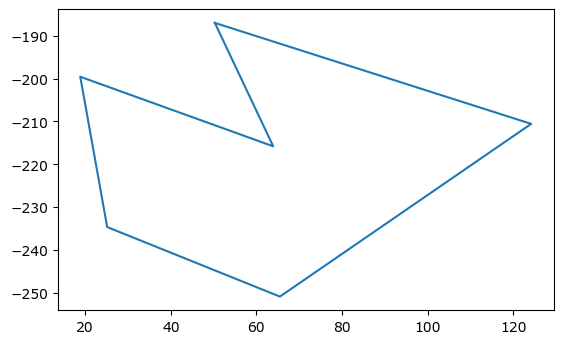

In [5]:
from xml.dom import minidom
from svg.path import parse_path

doc = minidom.parse('test.svg')
path_index=1
parsed_path=parse_path(doc.getElementsByTagName('path')[path_index].getAttribute('d'))
#only use the start points of segments with a length <>0
polygon=[l.start for l in parsed_path if abs(l.start-l.end)>1e-6]

polygon+=polygon[0:1]#close the polygon for plotting purposes
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot([p.real for p in polygon],[-p.imag for p in polygon])  
ax.set_aspect('equal')  

In [3]:
polygon

[(50.285713+187j),
 (124.14286+210.57143j),
 (124.14286+210.57143j),
 (65.476191+250.90475999999998j),
 (25.142857+234.66665999999998j),
 (18.857143+199.57142j),
 (63.904761+215.80952j),
 (50.285713+187j)]